<a href="https://colab.research.google.com/github/Tejaswini-Gsl/neural-networks/blob/main/enhance_architecture_ICP_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [4]:
y_train = y_train.reshape(-1,)

In [5]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [6]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# from keras.layers.convolutional import Convolution2D
# from keras.layers.convolutional import MaxPooling2D

In [16]:
AlexNet = Sequential()

# Normalize input
AlexNet.add(BatchNormalization(input_shape=(32, 32, 3)))

# Convolutional layers
AlexNet.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

AlexNet.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

AlexNet.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
AlexNet.add(BatchNormalization())
AlexNet.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fully connected layers
AlexNet.add(Flatten())
AlexNet.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
AlexNet.add(Dropout(0.3))
AlexNet.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
AlexNet.add(Dropout(0.3))
AlexNet.add(Dense(10, activation='softmax'))

# Compile model
AlexNet.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

AlexNet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 32, 32, 3)         12        
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                      

In [17]:
history1 = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 21s 8ms/step - loss: 2.1072 - accuracy: 0.4943 - val_loss: 1.5470 - val_accuracy: 0.6369
Epoch 2/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4480 - accuracy: 0.6567 - val_loss: 1.3448 - val_accuracy: 0.6893
Epoch 3/100
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3413 - accuracy: 0.7078 - val_loss: 1.3580 - val_accuracy: 0.7067
Epoch 4/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2995 - accuracy: 0.7375 - val_loss: 1.3352 - val_accuracy: 0.7167
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2542 - accuracy: 0.7562 - val_loss: 1.2504 - val_accuracy: 0.7535
Epoch 6/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2240 - accuracy: 0.7685 - val_loss: 1.2743 - val_accuracy: 0.7506
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1990 - accuracy: 0.7788 - val_loss: 1.2640 -

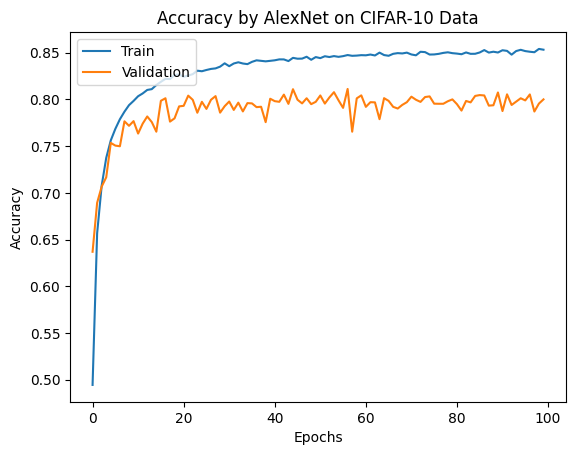

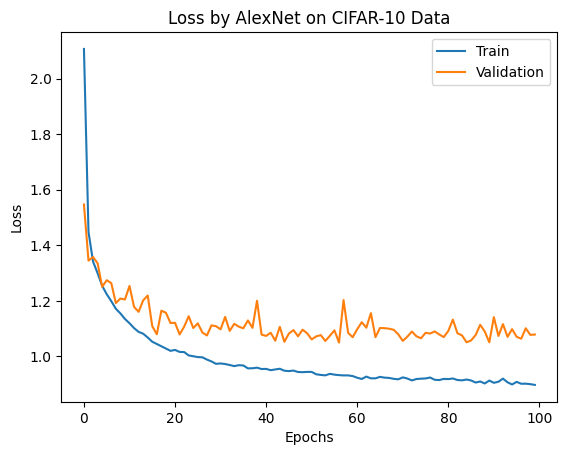

In [18]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [19]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 [==============================] - 1s 3ms/step


array([[902,   9,  20,  21,   2,   2,   2,   9,  22,  11],
       [ 19, 858,   5,   7,   1,   1,   7,   1,  21,  80],
       [ 95,   2, 725,  47,  42,  13,  42,  19,  11,   4],
       [ 31,   7,  64, 708,  36,  48,  54,  30,  13,   9],
       [ 33,   1,  59,  53, 733,   3,  33,  77,   5,   3],
       [ 20,   2,  71, 191,  27, 609,  20,  49,   4,   7],
       [ 11,   4,  31,  44,  23,   4, 872,   4,   6,   1],
       [ 15,   2,  27,  48,  20,  15,   5, 865,   0,   3],
       [ 96,  10,  11,   7,   1,   1,   4,   4, 851,  15],
       [ 35,  31,   1,  15,   0,   3,   6,  10,  21, 878]])

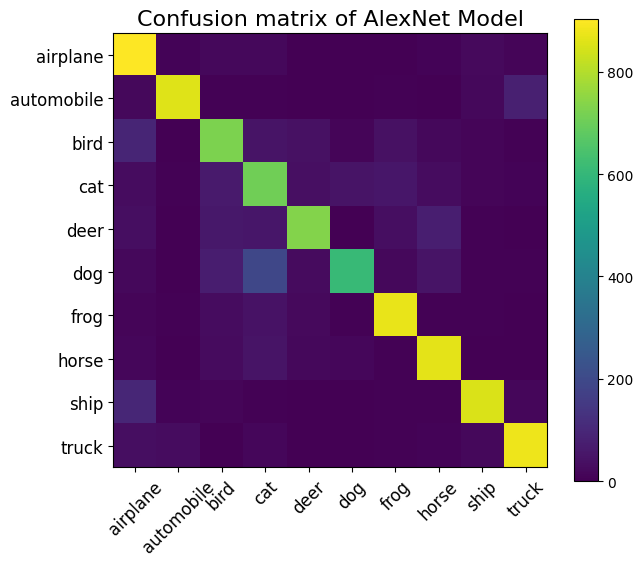

In [20]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [24]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions1))

Test accuracy by AlexNet: 0.8001


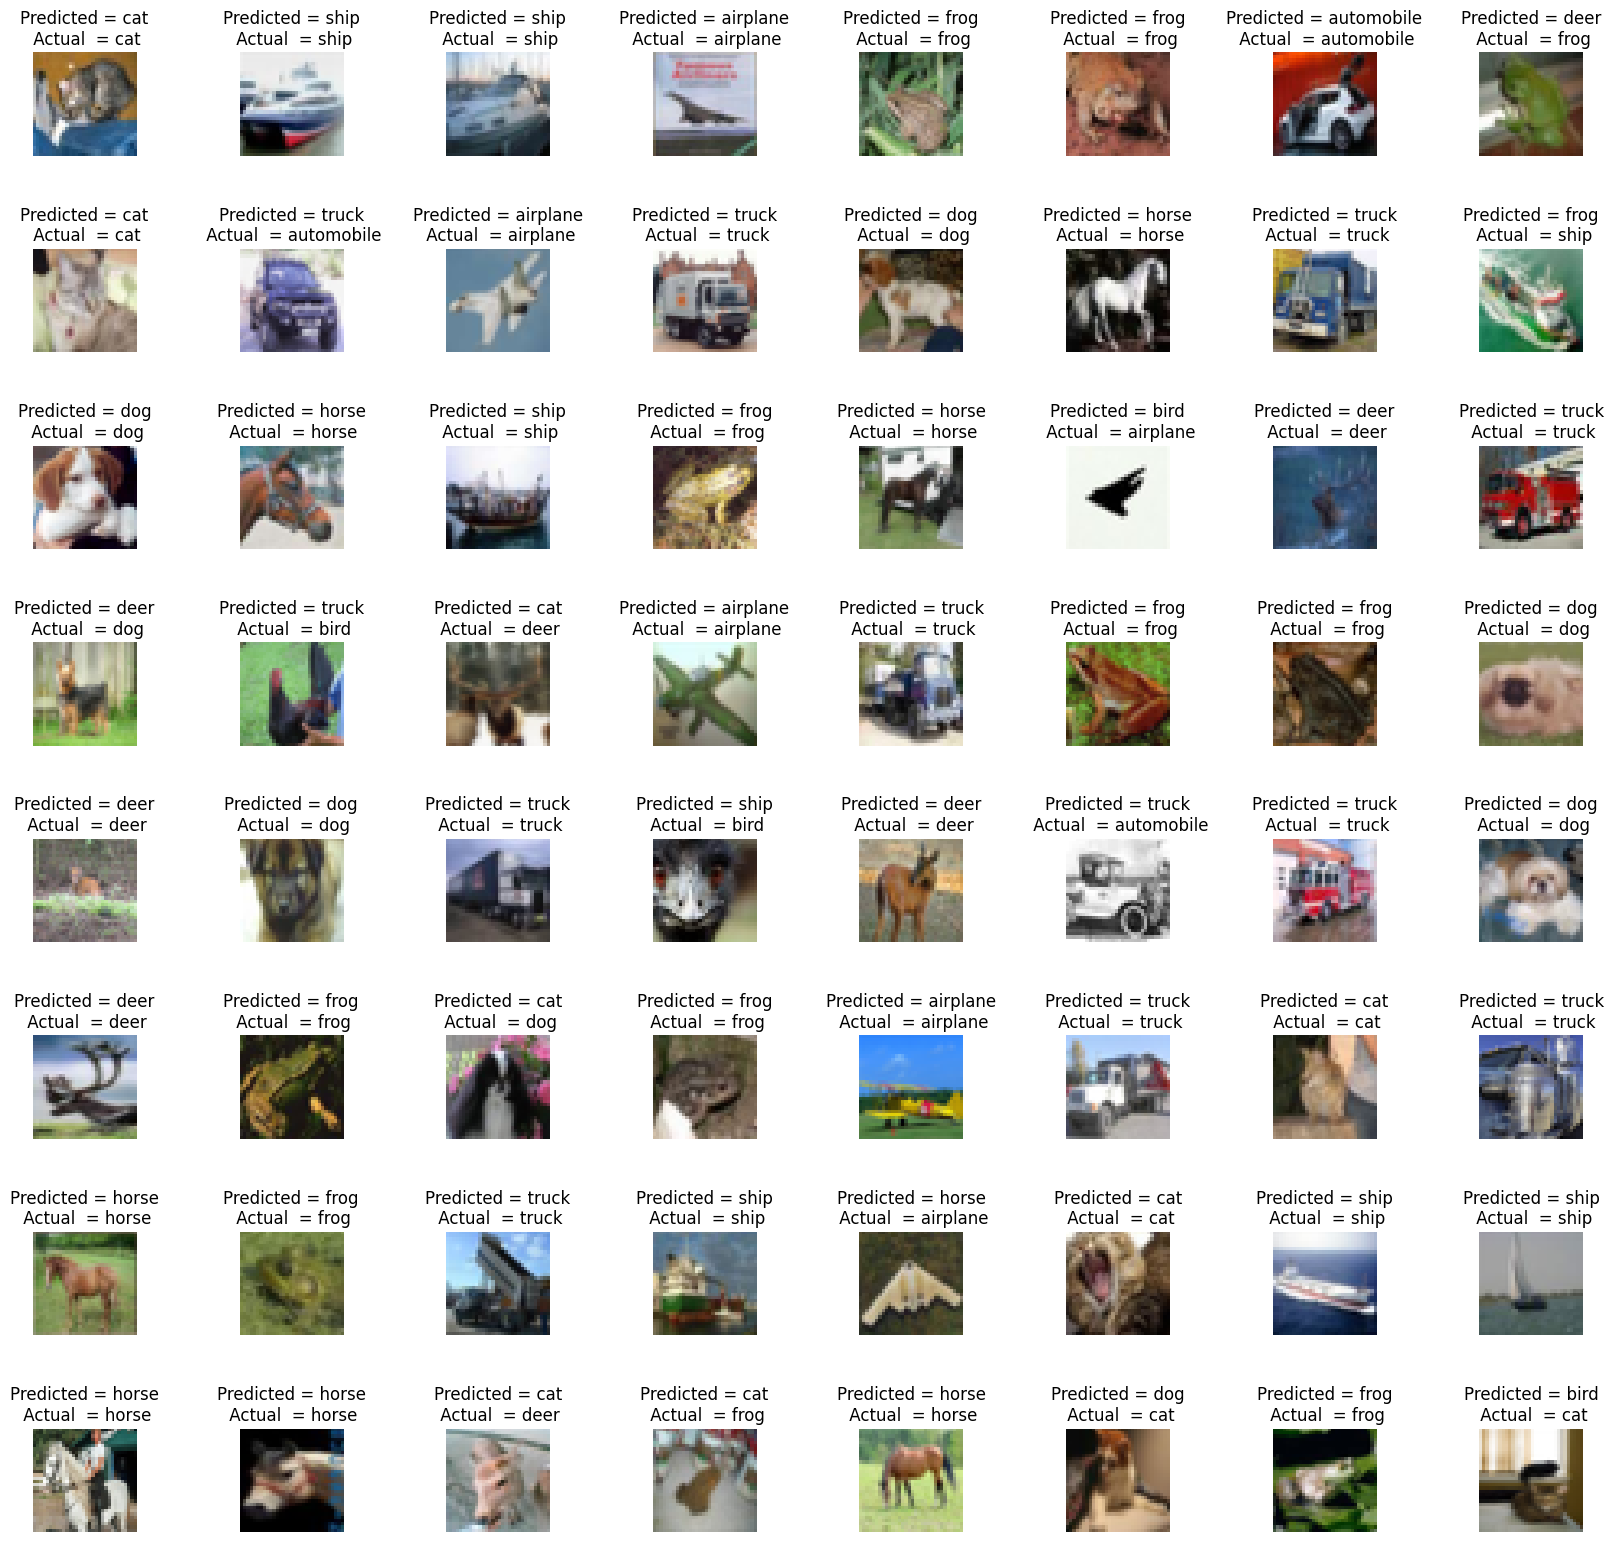

In [26]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions1[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

Additional visualizations

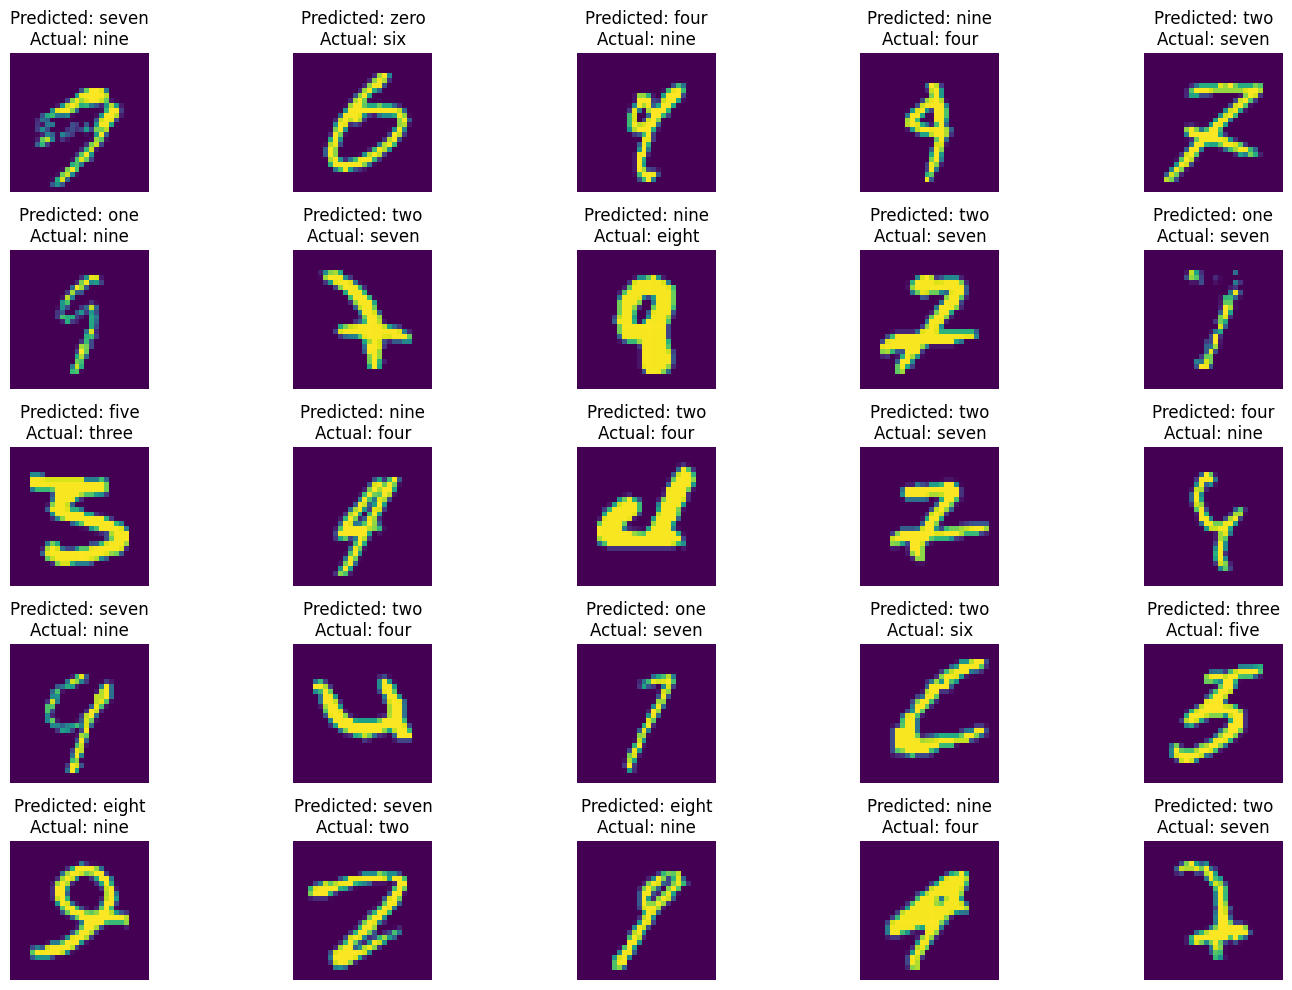

In [85]:


# Get misclassified indices
misclassified_idx = np.where(y_predictions1 != y_test)[0]

# Select a subset of misclassified images
subset_idx = np.random.choice(misclassified_idx, size=25, replace=False)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10))

# Plot misclassified images
for i, idx in enumerate(subset_idx):
    ax = axes.flat[i]
    ax.imshow(x_test[idx])
    ax.set_title(f"Predicted: {classes[y_predictions1[idx]]}\nActual: {classes[y_test[idx]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

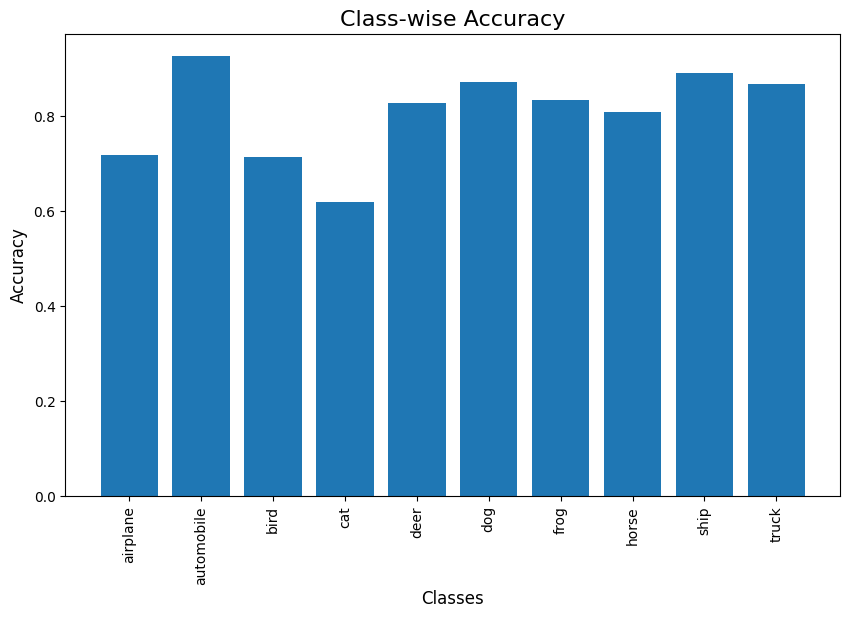

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate class-wise accuracy
class_accuracy = []
for i in range(len(classes)):
    true_positives = confusion_matrix(y_test, y_predictions1)[i, i]
    total_instances = np.sum(confusion_matrix(y_test, y_predictions1)[:, i])
    class_accuracy.append(true_positives / total_instances)

# Plot class-wise accuracy
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(classes, class_accuracy)
ax.set_xlabel('Classes', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Class-wise Accuracy', fontsize=16)
plt.xticks(rotation=90)
plt.show()